In [2]:
# -*- coding: utf-8 -*-
"""
Created on Mon Aug  3 19:03:01 2020
@author: youss
"""
import os
from typing import Text, Tuple

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor as gbm
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from scipy import cluster
from sklearn import preprocessing
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from numpy.random import random
import umap
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
import pickle
from sklearn import metrics
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.decomposition import PCA


## Create the data set

In [48]:
study_a = pd.read_csv(r"C:\Users\nlaya\Downloads\Study_A.csv")
study_b = pd.read_csv(r"C:\Users\nlaya\Downloads\Study_B.csv")
study_c = pd.read_csv(r"C:\Users\nlaya\Downloads\Study_C.csv")
study_d = pd.read_csv(r"C:\Users\nlaya\Downloads\Study_D.csv")
study_e = pd.read_csv(r"C:\Users\nlaya\Downloads\Study_E.csv")

In [49]:
# Create one dataframe
study = pd.concat([study_a,study_b],ignore_index=True)
study = pd.concat([study,study_c],ignore_index=True)
study = pd.concat([study,study_d],ignore_index=True)
# study_E  = study_e
study

,Study,Country,PatientID,SiteID,RaterID,AssessmentID,TxGroup,VisitDay,P1,P2,...,G9,G10,G11,G12,G13,G14,G15,G16,PANSS_Total,LeadStatus
0,A,USA,10001,20035,30076,100679,Control,0,5,5,...,5,3,3,4,3,3,3,5,107,Assign to CS
1,A,USA,10001,20035,30076,101017,Control,11,5,5,...,5,3,3,4,3,3,3,5,109,Assign to CS
2,A,USA,10001,20035,30076,102177,Control,18,4,4,...,4,2,2,3,3,2,3,4,91,Passed
3,A,USA,10001,20035,30076,101533,Control,25,3,3,...,3,2,2,3,3,2,3,4,80,Flagged
4,A,USA,10001,20035,30076,100930,Control,39,3,3,...,3,2,2,3,3,2,3,4,77,Flagged
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20942,D,China,40223,80001,120013,400496,Treatment,17,4,3,...,3,1,3,5,2,2,4,4,79,Flagged
20943,D,China,40223,80001,120013,402261,Treatment,21,4,3,...,3,1,2,4,2,2,3,3,71,Flagged
20944,D,China,40223,80001,120013,400605,Treatment,28,4,3,...,2,1,3,4,2,2,3,3,74,Flagged
20945,D,China,40223,80001,120013,402460,Treatment,42,4,3,...,3,1,3,5,2,2,4,3,77,Flagged


## Principal Components 

In [50]:
from sklearn.preprocessing import StandardScaler
features = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'N1',
       'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'G1', 'G2', 'G3', 'G4', 'G5', 'G6',
       'G7', 'G8', 'G9', 'G10', 'G11', 'G12', 'G13', 'G14', 'G15', 'G16']
# Separating out the features
x = study.loc[:, features].values
# Separating out the target
#y = study.loc[:,['PANSS_Total']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

# Separating out the features
xe = study_e.loc[:, features].values
# Separating out the target
#y = study.loc[:,['PANSS_Total']].values
# Standardizing the features
xe = StandardScaler().fit_transform(xe)


In [51]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pca1', 'pca2','pca3','pca4','pca5'])

principalComponentse = pca.fit_transform(xe)
principalDfe = pd.DataFrame(data = principalComponentse
             , columns = ['pca1', 'pca2','pca3','pca4','pca5'])

In [52]:
pca.explained_variance_ratio_.cumsum()

array([0.20784331, 0.35694347, 0.42097308, 0.47340682, 0.51754096])

In [53]:
study_Df = pd.concat([ study[['Study', 'Country', 'PatientID', 'SiteID', 'RaterID', 'AssessmentID',
       'TxGroup', 'VisitDay','PANSS_Total','LeadStatus']],principalDf], axis = 1)

def LeadStatus(x):
    if x=='Passed':
        return 2
    elif x=='Assign to CS':
        return 1
    elif x=='Flagged':
        return 0
study_Df['LeadStatus'] = study_Df['LeadStatus'].apply(lambda x : LeadStatus(x))


study_Df

,Study,Country,PatientID,SiteID,RaterID,AssessmentID,TxGroup,VisitDay,PANSS_Total,LeadStatus,pca1,pca2,pca3,pca4,pca5
0,A,USA,10001,20035,30076,100679,Control,0,107,1,5.593656,-2.556485,-1.238885,-0.335244,1.250182
1,A,USA,10001,20035,30076,101017,Control,11,109,1,5.872074,-2.650186,-1.436511,-0.275018,0.864912
2,A,USA,10001,20035,30076,102177,Control,18,91,2,3.007536,-0.829132,-2.005766,-0.072055,0.971408
3,A,USA,10001,20035,30076,101533,Control,25,80,0,1.311278,-0.279380,-1.049764,-0.373288,1.061580
4,A,USA,10001,20035,30076,100930,Control,39,77,0,0.939654,-0.248050,-0.481266,-0.714422,1.188067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20942,D,China,40223,80001,120013,400496,Treatment,17,79,0,1.340655,1.236202,0.407790,0.049303,2.095645
20943,D,China,40223,80001,120013,402261,Treatment,21,71,0,-0.123395,-0.488950,-0.263306,0.065781,1.913234
20944,D,China,40223,80001,120013,400605,Treatment,28,74,0,0.415094,0.255828,0.256294,0.551082,1.694367
20945,D,China,40223,80001,120013,402460,Treatment,42,77,0,0.934756,0.226870,-0.030299,-0.301250,1.516739


In [54]:
# study = study[['Study', 'Country', 'PatientID', 'SiteID', 'RaterID', 'AssessmentID',
#        'TxGroup', 'VisitDay','PANSS_Total','LeadStatus']+features]

def LeadStatus(x):
    if x=='Passed':
        return 2
    elif x=='Assign to CS':
        return 1
    elif x=='Flagged':
        return 0
study['LeadStatus'] = study['LeadStatus'].apply(lambda x : LeadStatus(x))


study

,Study,Country,PatientID,SiteID,RaterID,AssessmentID,TxGroup,VisitDay,P1,P2,...,G9,G10,G11,G12,G13,G14,G15,G16,PANSS_Total,LeadStatus
0,A,USA,10001,20035,30076,100679,Control,0,5,5,...,5,3,3,4,3,3,3,5,107,1
1,A,USA,10001,20035,30076,101017,Control,11,5,5,...,5,3,3,4,3,3,3,5,109,1
2,A,USA,10001,20035,30076,102177,Control,18,4,4,...,4,2,2,3,3,2,3,4,91,2
3,A,USA,10001,20035,30076,101533,Control,25,3,3,...,3,2,2,3,3,2,3,4,80,0
4,A,USA,10001,20035,30076,100930,Control,39,3,3,...,3,2,2,3,3,2,3,4,77,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20942,D,China,40223,80001,120013,400496,Treatment,17,4,3,...,3,1,3,5,2,2,4,4,79,0
20943,D,China,40223,80001,120013,402261,Treatment,21,4,3,...,3,1,2,4,2,2,3,3,71,0
20944,D,China,40223,80001,120013,400605,Treatment,28,4,3,...,2,1,3,4,2,2,3,3,74,0
20945,D,China,40223,80001,120013,402460,Treatment,42,4,3,...,3,1,3,5,2,2,4,3,77,0


In [55]:
# study_E = pd.concat([ study_e[[ 'PatientID', 'SiteID', 'RaterID', 'AssessmentID'
#       , 'VisitDay','PANSS_Total']],principalDfe], axis = 1)
# study_E

In [56]:
study_E  = study_e

In [57]:
#seed(2020)
study_Df = study_Df.reindex(np.random.permutation(study_Df.index))
study_Df

,Study,Country,PatientID,SiteID,RaterID,AssessmentID,TxGroup,VisitDay,PANSS_Total,LeadStatus,pca1,pca2,pca3,pca4,pca5
3377,B,Romania,20126,40018,60021,200657,Control,21,91,2,3.309775,1.235642,2.231818,-0.441792,1.040025
8508,C,Spain,30510,60023,90239,309472,Control,7,90,2,2.900577,-0.120510,1.623946,-1.836030,-0.345550
7572,C,Japan,30392,60116,90099,300265,Treatment,170,69,2,-0.594298,-0.729756,-0.586742,0.448929,0.138213
10363,C,China,30732,60069,90222,303368,Control,16,83,2,1.767063,1.800581,-0.583859,-0.373856,0.805457
20322,D,China,40176,80001,120011,400899,Treatment,243,65,0,-1.395919,1.051120,-1.886070,1.224372,-0.527444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20493,D,China,40190,80001,120032,400419,Treatment,135,56,1,-2.377687,1.788844,1.550479,1.827895,-0.658379
6784,C,Russia,30291,60166,90296,313189,Control,47,75,2,0.567513,-0.220081,-1.309871,0.413861,-1.883736
17843,C,Bulgaria,31602,60038,90386,304547,Treatment,49,74,2,0.278796,-1.822136,0.065674,-1.469751,-0.762392
869,A,USA,10125,20023,30059,100311,Control,67,86,0,2.201911,-3.732572,-0.366923,-1.533930,1.534138


## Split data set to a training and a test sets

In [58]:
# X_train = study_Df.iloc[0:int(20947*0.9),:]
# X_test = study_Df.iloc[int(20947*0.9):20947,:]

# y_train = X_train['LeadStatus']
# X_train.drop(['LeadStatus'],axis=1)
# y_test = X_test['LeadStatus']
# X_test.drop(['LeadStatus'],axis=1)

X_train = study.iloc[0:int(len(study)*0.9),:]
X_test = study.iloc[int(len(study)*0.9):len(study),:]

y_train = X_train['LeadStatus']
X_train.drop(['LeadStatus'],axis=1)
y_test = X_test['LeadStatus']
X_test.drop(['LeadStatus'],axis=1)


,Study,Country,PatientID,SiteID,RaterID,AssessmentID,TxGroup,VisitDay,P1,P2,...,G8,G9,G10,G11,G12,G13,G14,G15,G16,PANSS_Total
18852,D,China,40062,80001,120042,402382,Control,15,3,3,...,3,3,3,3,5,3,1,4,3,78
18853,D,China,40062,80001,120042,400384,Control,22,3,3,...,3,3,3,3,5,3,1,4,3,78
18854,D,China,40062,80001,120042,402193,Control,36,3,3,...,2,3,3,3,5,3,1,4,3,73
18855,D,China,40062,80001,120042,400174,Control,64,1,1,...,1,1,2,1,4,2,1,3,2,53
18856,D,China,40062,80001,120042,401416,Control,78,1,1,...,1,1,2,1,4,2,1,3,2,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20942,D,China,40223,80001,120013,400496,Treatment,17,4,3,...,3,3,1,3,5,2,2,4,4,79
20943,D,China,40223,80001,120013,402261,Treatment,21,4,3,...,2,3,1,2,4,2,2,3,3,71
20944,D,China,40223,80001,120013,400605,Treatment,28,4,3,...,3,2,1,3,4,2,2,3,3,74
20945,D,China,40223,80001,120013,402460,Treatment,42,4,3,...,2,3,1,3,5,2,2,4,3,77


## Tuning XGBOOST parameters

In [59]:
X_train = X_train[['VisitDay','PANSS_Total']+features]
X_test = X_test[['VisitDay','PANSS_Total']+features]

np.random.seed(42)
rd = np.random.permutation(len(X_train))
X_train = X_train.iloc[rd]
y_train = y_train.iloc[rd]

# param_test = {
#   'learning_rate':list(np.logspace(-0.01,-0.3,3)),
#    'reg_lambda':list(np.logspace(-0.01,-0.3,3)),
#    'max_depth': [6],
#    'subsample': [0.8],
#    'gamma': list(np.logspace(-0.1,-0.3,2))
#  }
# gsearch = GridSearchCV(estimator = xgb.XGBClassifier( objective= 'multi:softmax', eval_metric = 'mlogloss',
#   min_child_weight=6, gamma=0.1, colsample_bytree=0.8, nthread=4,seed=27), 
#   param_grid = param_test, cv=5)
# gsearch.fit(X_train,y_train)
# learning_rate = gsearch.best_params_['learning_rate']
# reg_lambda = gsearch.best_params_['reg_lambda']
# max_depth = gsearch.best_params_['max_depth']
# subsample = gsearch.best_params_['subsample'] 
# print('learning_rate '+str(learning_rate))
# print('reg_lambda '+str(reg_lambda))
# print('max_depth '+str(max_depth))  
# print('subsample '+str(subsample))
# gamma = gsearch.best_params_['gamma'] 
# print(gamma)




In [60]:

# learning_rate = 0.33334
# reg_alpha = 1e-06
# max_depth  = 4
# subsample  = 0.95

#### best score
# learning_rate =  1e-05
# reg_alpha = 1.0
# max_depth = 4
# subsample  = 0.8

# xgbc2
# learning_rate 0.001
# reg_alpha 0.0001
# max_depth 6
# subsample 0.7

In [61]:
#   learning_rate = 0.01, reg_alpha = 0.05, max_depth = 4, subsample = 0.8,
xgbc4 = xgb.XGBClassifier(objective='multi:softprob', learning_rate = 0.001, reg_alpha = 0.0001 , eval_metric = 'mlogloss',
                        max_depth = 6, subsample = 0.7, min_child_weight=6, gamma=0.4, colsample_bytree=0.6, nthread=4,seed=27)
xgbc4.fit(X_train, y_train.values)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, eval_metric='mlogloss',
              gamma=0.4, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.001, max_delta_step=0,
              max_depth=6, min_child_weight=6, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4, nthread=4,
              num_parallel_tree=1, objective='multi:softprob', random_state=27,
              reg_alpha=0.0001, reg_lambda=1, scale_pos_weight=None, seed=27,
              subsample=0.7, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [62]:
pred_y_ts = xgbc4.predict(X_test)
pred_y_tr = xgbc4.predict(X_train)

In [63]:
print(" Confusion matrix on the training set:")
print(metrics.confusion_matrix(y_train, pred_y_tr))

 Confusion matrix on the training set:
[[    1     1  1254]
 [    0    47  1912]
 [    0     0 15637]]


In [64]:
print(metrics.confusion_matrix(y_test, pred_y_ts))
m = metrics.confusion_matrix(y_test, pred_y_ts)
(np.sum(m)-np.sum(np.diag(m)))/np.sum(m) 

[[   0    3 1371]
 [   0   17  500]
 [   0    2  202]]


0.8954653937947494

In [65]:
pred_y_ts_prob = xgbc4.predict_proba(X_test)
pred_y_tr_prob = xgbc4.predict_proba(X_train)
np.sum(xgbc4.predict(X_test)==2)

2073

In [73]:
AssessmentID = study_E['AssessmentID']
study_E = study_E[['VisitDay','PANSS_Total']+features]

In [74]:
pred_y_test_prob = xgbc4.predict_proba(study_E)
np.max(pred_y_test_prob[:,0:2],axis=1)
np.sum(xgbc4.predict(X_test)==0)

0

In [75]:
submission = pd.DataFrame(columns=['AssessmentID','LeadStatus'])
submission['AssessmentID'] = AssessmentID
submission['LeadStatus'] = np.max(pred_y_test_prob[:,0:2],axis=1)
submission.to_csv(r"C:\Users\nlaya\Downloads\submission_classification14.csv",index=False)

In [76]:
study_E

,VisitDay,PANSS_Total,P1,P2,P3,P4,P5,P6,P7,N1,...,G7,G8,G9,G10,G11,G12,G13,G14,G15,G16
0,0,70,4,3,5,1,3,4,3,3,...,1,2,3,3,1,4,1,3,3,4
1,0,82,3,4,1,3,2,4,1,3,...,1,2,3,1,4,3,3,1,3,3
2,38,77,3,4,1,1,1,2,1,3,...,2,3,4,1,3,3,3,1,2,3
3,78,75,3,4,1,2,1,1,1,3,...,2,3,3,1,3,3,3,1,3,3
4,119,76,3,3,1,1,1,1,1,3,...,2,2,4,1,3,3,3,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1957,83,66,3,3,1,1,1,1,1,3,...,1,3,3,1,3,3,4,1,2,3
1958,125,60,3,2,1,1,1,1,1,3,...,1,2,3,1,3,3,3,1,2,3
1959,168,54,2,2,1,1,1,1,1,3,...,1,1,2,3,3,3,3,1,2,1
1960,0,44,1,1,1,1,1,1,1,3,...,1,1,1,1,3,2,2,2,3,1


In [77]:
pred_y_test = xgbc4.predict_proba(study_E)


In [79]:
# ytrain_E = pd.DataFrame()
# ytrain_E['LeadStatus'] = pred_y_test
# #ytrain_E = pd.concat([y_train,ytrain_E],ignore_index=True)
# #ytrain_E.reset_index(drop=True)
# pd.Series.get(ytrain_E,key='LeadStatus')

In [362]:
X_train.to_csv(r"C:\Users\nlaya\Downloads\trainX",index=False)
y_train.to_csv(r"C:\Users\nlaya\Downloads\trainy",index=False)
X_test.to_csv(r"C:\Users\nlaya\Downloads\testX",index=False)
y_test.to_csv(r"C:\Users\nlaya\Downloads\testy",index=False)
study_E.to_csv(r"C:\Users\nlaya\Downloads\testXE",index=False)

C:\Users\nlaya\AppData\Local\Continuum\anaconda3\envs\PythonCPU\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  
C:\Users\nlaya\AppData\Local\Continuum\anaconda3\envs\PythonCPU\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  after removing the cwd from sys.path.


In [426]:
Xtrain = pd.concat([X_train,X_test],ignore_index=True)
ytrain = pd.concat([y_train,y_test],ignore_index=True)

#Xtrain = pd.concat([Xtrain,study_E],ignore_index=True)
#ytrain = pd.concat([ytrain,pd.Series.get(ytrain_E,key='LeadStatus')],ignore_index=True)

In [473]:
param_test = {
  'learning_rate':list(np.logspace(-0.01,-0.3,4)),
   'reg_alpha':list(np.logspace(-0.01,-0.3,4)),
   'max_depth': [6],
   'subsample': [0.7],
   'gamma': list(np.logspace(-0.1,-0.3,3))
 }
gsearch = GridSearchCV(estimator = xgb.XGBClassifier( objective= 'multi:softmax', eval_metric = 'mlogloss',
  min_child_weight=6, gamma=0.1, colsample_bytree=0.8, nthread=4,seed=27), 
  param_grid = param_test, cv=5)
gsearch.fit(Xtrain,ytrain)
learning_rate = gsearch.best_params_['learning_rate']
reg_alpha = gsearch.best_params_['reg_alpha']
max_depth = gsearch.best_params_['max_depth']
subsample = gsearch.best_params_['subsample'] 
print('learning_rate '+str(learning_rate))
print('reg_lambda '+str(reg_lambda))
print('max_depth '+str(max_depth))  
print('subsample '+str(subsample))
gamma = gsearch.best_params_['gamma'] 
print(gamma)

learning_rate 0.5011872336272722
reg_lambda 0.9772372209558107
max_depth 6
subsample 0.7
0.7943282347242815


In [668]:
# xgbc2 X_train, Y_train  learning_rate = 0.01, reg_alpha = 0.05, max_depth = 4, subsample = 0.8,
# xgbc3 = xgb.XGBClassifier(objective='multi:softmax', learning_rate = 0.01, reg_alpha =0.05 , 
#                         max_depth = 4, subsample = 0.8, min_child_weight=6, gamma=0.1, colsample_bytree=0.6, nthread=4,seed=27)
# xgbc3.fit(Xtrain, ytrain.values)

xgbc = xgb.XGBClassifier(objective='multi:softmax', learning_rate = 0.001, reg_alpha =0.0001 , eval_metric = 'mlogloss',
                        max_depth = 6, subsample = 0.7, min_child_weight=6, gamma= 0.1, colsample_bytree=0.7, nthread=4,seed=27)
xgbc.fit(Xtrain, ytrain.values)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, eval_metric='mlogloss',
              gamma=0.1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.001, max_delta_step=0,
              max_depth=6, min_child_weight=6, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4, nthread=4,
              num_parallel_tree=1, objective='multi:softprob', random_state=27,
              reg_alpha=0.0001, reg_lambda=1, scale_pos_weight=None, seed=27,
              subsample=0.7, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [697]:
pred_y_ts = xgbc3.predict(X_test)
#pred_y_tr = xgbc3.predict(X_train)

In [698]:
print(metrics.confusion_matrix(y_test, pred_y_ts))
m = metrics.confusion_matrix(y_test, pred_y_ts)
(np.sum(m)-np.sum(np.diag(m)))/np.sum(m)

[[  10   24 1340]
 [   5   69  443]
 [   1    4  199]]


0.8673031026252983

In [678]:
pred_y_test_imp1 = xgbc2.predict_proba(study_E)
pred_y_test_prob3 = xgbc3.predict_proba(study_E)
pred_y_test_prob_4 = xgbc4.predict_proba(study_E)
#pred_y_test



pred_y_test1 = np.max(pred_y_test_imp1[:,0:2],axis=1)

#pred_y_test1 = np.max(pred_y_test1[:,0:2],axis=1)
pred_y_test2 = np.max(pred_y_test_prob3[:,0:2],axis=1)
pred_y_test3 = np.max(pred_y_test_prob_4[:,0:2],axis=1)
(pred_y_test2 + pred_y_test1+ pred_y_test3)/3
#pred_y_test3 - (pred_y_test2 + pred_y_test1+ pred_y_test3)/3
(2*pred_y_test2 + 4*pred_y_test1+ 2*pred_y_test3)/8

array([0.29652205, 0.29368162, 0.28692186, ..., 0.28395835, 0.31980938,
       0.30210054], dtype=float32)

In [691]:
(4*pred_y_test2 + 2*pred_y_test1+ 3*pred_y_test3)/9

array([0.2793552 , 0.27439398, 0.2636564 , ..., 0.2621557 , 0.3147105 ,
       0.28899604], dtype=float32)

In [693]:
(4*pred_y_test2 + 2*pred_y_test1+ 4*pred_y_test3)/10

array([0.28345308, 0.2788369 , 0.26886553, ..., 0.26747397, 0.31606984,
       0.29234895], dtype=float32)

In [694]:
submission2 = pd.DataFrame(columns=['AssessmentID','LeadStatus'])
submission2['AssessmentID'] = AssessmentID
submission2['LeadStatus'] = (4*pred_y_test2 + 2*pred_y_test1+ 4*pred_y_test3)/10 #    (3*pred_y_test2 + 9*pred_y_test1)/12
submission2.to_csv(r"C:\Users\nlaya\Downloads\submission_classification12.csv",index=False)

In [454]:
try:
    import cPickle as pickle
except ImportError:
    import pickle

In [455]:
with open('xgbc2.pkl', 'wb') as f:
    pickle.dump(xgbc2, f) 

In [456]:
with open('xgbc3.pkl', 'wb') as g:
    pickle.dump(xgbc3, g) 

In [558]:
pred_y_test3

array([0.2940651 , 0.29292884, 0.28338042, ..., 0.28419006, 0.32197493,
       0.2988189 ], dtype=float32)

In [557]:
pred_y_test1

array([0.31830367, 0.31842273, 0.31701568, ..., 0.3114323 , 0.3260419 ,
       0.3183532 ], dtype=float32)

In [564]:
(3*pred_y_test2 + pred_y_test1+ pred_y_test3)/5

array([0.25996196, 0.25370473, 0.23882404, ..., 0.23770289, 0.3089133 ,
       0.27293682], dtype=float32)

2630

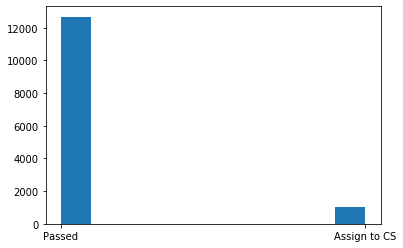

In [587]:
plt.hist(study_c['LeadStatus'])
#plt.savefig(r'C:\Users\nlaya\Downloads\hist_project.png')
len(study[study['LeadStatus']=='Flagged'])

In [588]:
from xgboost import plot_importance

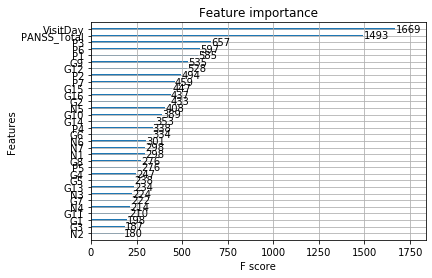

In [590]:
plot_importance(xgbc2)

In [643]:
def st(x):
    if x=='A':
        return 0
    elif x=='B':
        return 1
    elif x=='C':
        return 2
    elif x=='D':
        return 3
    
def tx(x):
    if x=='Control':
        return 0
    if x=='Treatment':
        return 1
    
def LeadStatus(x):
    if x=='Passed':
        return 2
    elif x=='Assign to CS':
        return 1
    elif x=='Flagged':
        return 0


study_y = study['LeadStatus']
study_X = study.drop(['LeadStatus','Country','AssessmentID','Study','PatientID'],axis=1)
#study_X['Study'] = study_X['Study'].apply(lambda x: st(x))
study_X['TxGroup'] = study_X['TxGroup'].apply(lambda x: tx(x))

study_y = study_y.apply(lambda x : LeadStatus(x))

study_test = study_e.copy()
study_test = study_e.drop(['Country','AssessmentID','Study','PatientID'],axis=1)
#study_test['Study'] = study_test['Study'].apply(lambda x: st(x))
study_test['TxGroup'] = study_test['TxGroup'].apply(lambda x: tx(x))

np.random.seed(42)
rd = np.random.permutation(len(X_train))
study_X = study_X.iloc[rd]
study_y = study_y.iloc[rd]

xgbc = xgb.XGBClassifier(objective='multi:softmax', learning_rate = 0.01, reg_alpha =0.05 , eval_metric = 'mlogloss',
                        max_depth = 4, subsample = 0.7, min_child_weight=6, gamma= 0.1, colsample_bytree=0.7, nthread=4,seed=27)

xgb_important_feat = xgbc.fit(study_X,study_y)

In [649]:
xgb_important_feat

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, eval_metric='mlogloss',
              gamma=0.1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=4, min_child_weight=6, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4, nthread=4,
              num_parallel_tree=1, objective='multi:softprob', random_state=27,
              reg_alpha=0.05, reg_lambda=1, scale_pos_weight=None, seed=27,
              subsample=0.7, tree_method='exact', validate_parameters=1,
              verbosity=None)

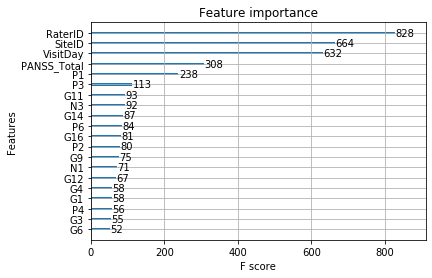

In [655]:
plot_importance(xgb_important_feat, max_num_features=20)

In [645]:
pred_y_test_imp = xgb_important_feat.predict_proba(study_test)

In [646]:
pred_y_test = np.max(pred_y_test_imp[:,0:2],axis=1)

In [647]:
pred_y_test_imp

array([[0.29721656, 0.38732508, 0.3154584 ],
       [0.30997065, 0.34321606, 0.34681326],
       [0.3502739 , 0.29297805, 0.356748  ],
       ...,
       [0.51256233, 0.20191295, 0.2855247 ],
       [0.3169193 , 0.35818738, 0.32489333],
       [0.36984628, 0.3507609 , 0.27939275]], dtype=float32)

In [648]:
submission3 = pd.DataFrame(columns=['AssessmentID','LeadStatus'])
submission3['AssessmentID'] = AssessmentID
submission3['LeadStatus'] = pred_y_test  #    (3*pred_y_test2 + 9*pred_y_test1)/12
submission3.to_csv(r"C:\Users\nlaya\Downloads\submission_classification13.csv",index=False)

In [654]:
set(study_test['RaterID']) - set(study_X['RaterID'])

{150001,
 150002,
 150003,
 150004,
 150005,
 150006,
 150007,
 150009,
 150010,
 150011,
 150012,
 150013,
 150014,
 150015,
 150016,
 150017,
 150018,
 150019,
 150020,
 150021,
 150022,
 150023,
 150024,
 150025,
 150026,
 150027,
 150028,
 150029,
 150030,
 150031,
 150032,
 150033,
 150034,
 150035,
 150036,
 150037,
 150038,
 150039,
 150040,
 150041,
 150042,
 150043,
 150044,
 150045,
 150046,
 150047,
 150048,
 150049,
 150050,
 150051,
 150052,
 150053,
 150054,
 150055,
 150056,
 150057,
 150058,
 150059,
 150060,
 150061,
 150062,
 150063,
 150064,
 150065,
 150066,
 150067,
 150068,
 150069,
 150070,
 150071,
 150072,
 150073,
 150074,
 150075,
 150076,
 150077,
 150078,
 150079,
 150080,
 150081,
 150082,
 150083,
 150084,
 150085,
 150086,
 150087,
 150088,
 150089,
 150090,
 150091,
 150092,
 150093,
 150094,
 150095,
 150096,
 150097,
 150098,
 150099,
 150100,
 150101,
 150102,
 150103,
 150104,
 150105,
 150106,
 150107,
 150108,
 150109,
 150110,
 150111,
 150112,
 

In [656]:
xgbc2

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.001, max_delta_step=0, max_depth=6,
              min_child_weight=6, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, nthread=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=27, reg_alpha=0.0001,
              reg_lambda=1, scale_pos_weight=None, seed=27, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [758]:
xgbc3

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=6, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, nthread=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=27, reg_alpha=0.05,
              reg_lambda=1, scale_pos_weight=None, seed=27, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

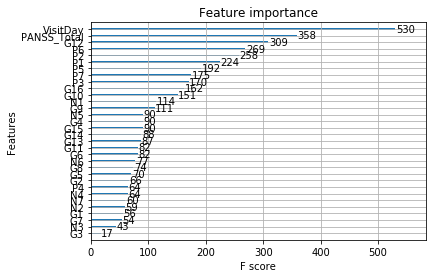

In [759]:
plot_importance(xgbc3)

In [766]:
s1 = pd.read_csv(r"C:\Users\nlaya\Downloads\submission_classification12_1.csv")
s2 = pd.read_csv(r"C:\Users\nlaya\Downloads\submission_classification12_2.csv")
s3 = pd.read_csv(r"C:\Users\nlaya\Downloads\submission_classification12_3.csv")
s4 = pd.read_csv(r"C:\Users\nlaya\Downloads\submission_classification12_4.csv")

In [767]:
s = (s1['LeadStatus']+s2['LeadStatus']+s3['LeadStatus']+s4['LeadStatus'])/4
s

0       0.280515
1       0.274967
2       0.265064
3       0.261907
4       0.262024
          ...   
1957    0.262431
1958    0.262163
1959    0.260698
1960    0.316373
1961    0.289971
Name: LeadStatus, Length: 1962, dtype: float64

In [81]:
submission2 = pd.DataFrame(columns=['AssessmentID','LeadStatus'])
submission2['AssessmentID'] = AssessmentID
submission2['LeadStatus'] = s  
submission2.to_csv(r"C:\Users\nlaya\Downloads\submission_classification18.csv",index=False)